# Introduction to Python final assignment
## Unfamiliar orthography discriminability study

### Concept - https://www.nature.com/articles/s41562-017-0186-2

This study reports how an unsupervised deep learning network trained on natural images developed domain-general features as a consequence of training and when exposed to print develop domain-specific features at upstream neurons. They claim that natural visual primitives can be tuned in a domain-specific way to allow for learning of written symbols.

With this prototype experiment, I will test if, for literate humans, a period of short exposure to natural images similar to those used in this study enhances their ability to identify written symbols. Participants will have to indicate whether two symbols from an unfamiliar script (Simplified Mandarin Chinese) rendered in different fonts and font sizes are the same or different, with DVs being accuracy and reaction time. The full experiment consists of a Training Phase and a Test Phase, with two training conditions.

### Training Conditions

One group will be trained with images from natural scenes, following the properties of the training set used in the paper cited above, by performing a repetition detection task. The other group will perform the same task, but with images from man-made sources (displays from non-polygonal video-games). Participants with less than 80% accuracy in the training phase are excluded from the final analysis.

### Test Phase

The test phase consists of a matching task using Chinese characters. Half of the trials present the same character, and the other half present different characters. For each trial, characters are rendered in one of four different fonts and one of three font sizes each, displayed in two of eight possible locations in a non-foveal circular array following a fixation cross presentation of 500ms. The font, font size and display locations are all randomly chosen.

### Analysis

Analyses will consist of an initial descriptive rendering of Accuracy and Reaction Time in Training (single group and averaged results), and in Test phase (per group and averaged results). This is followed by inferential statistics on Accuracy and RT in Training and Test phases as a function of training group




In [198]:
## Build image stimuli

from PIL import Image
import math

#Setup
base_directory = 'C:\\Users\\migbor\\mpi-python-intro\\Session6'
source_images_directory = (base_directory + '\\stimuli\\stimuli_originals\\non-natural')
output_images_directory = (base_directory + '\\stimuli')
os.chdir(source_images_directory)

images = os.listdir()
n_images = len(images)

#Natural/Non-natural toggle
Natural = 0

if Natural == 1:
    slice_prefix = 'natural'
else:
    slice_prefix = 'non-natural'
    
    
#Minimum image size: 800 x 800
#Size must be divisible by 400 on both dimensions

for image in range(n_images):

    test_image = images[image]
    original = Image.open(test_image).convert('L')
    original.save(test_image)
    
    width, height = original.size   # Get dimensions
    
    crop_x = width - (width % 400)
    crop_y = height - (height % 400)
    
    left = (width - crop_x)/2
    top = (height - crop_y)/2
    right = (width + crop_x)/2
    bottom = (height + crop_y)/2

    original = original.crop((left, top, right, bottom))
    
    width1, height1 = original.size
    
    if width1 > height1:
        width2 = height1
        height2 = height1
    elif height1 > width1:
        height2 = width1
        width2 = width1
    
    left = (width1 - width2)/2
    top = (height1 - height2)/2
    right = (width1 + width2)/2
    bottom = (height1 + height2)/2
              
    original = original.crop((left, top, right, bottom))
    
    original.save(test_image)
    
    graycrop = Image.open(test_image)
    
    width, height = graycrop.size
    
    print(height)
    
    num_tiles = (width/400) * (height/400)
    
    slice_name = (slice_prefix + '_' + (str(image)))
    
    tiles = image_slicer.slice(test_image, num_tiles, save = False)
    
    image_slicer.save_tiles(tiles, directory = output_images_directory, 
                            prefix = slice_name, format = 'png')

2000
800
1200
800
1200
800
2000
800
2800
2000
2000
800
1200
800
800
2400
1200
800
800
800


In [38]:
## Data collection

import os
import sys
import glob
import numpy as np
import psychopy.visual
import psychopy.event
import psychopy.gui
import psychopy.core
import random


#Setup
base_directory = 'C:\\Users\\migbor\\mpi-python-intro\\Session6'
stimuli_directory = (base_directory + '\\stimuli')
training_results_directory = (base_directory + '\\results\\training')
testing_results_directory = (base_directory + '\\results\\testing')
fonts_directory = (base_directory + '\\fonts')

os.chdir(fonts_directory)
fonts = os.listdir()
n_fonts = len(fonts)

gui = psychopy.gui.Dlg()

gui.addField("Subject ID:")
gui.addField("Group:")
#gui.addField("Number of trials:")

gui.show()

subj_id = gui.data[0]
group = gui.data[1]
#n_trials = int(gui.data[2])

# Default trial numbers should be 
data_path_training = subj_id + "_training_group_" + group + ".tsv"

if os.path.exists(data_path_training):
    sys.exit("Data path " + data_path_training + " already exists!")

exp_data = []

screen_size = [900,900]
text_color = 'White'

#Training

n_trials = 200
n_filler = int(n_trials/4)
pre_duration_s = 4
blank_duration_s = 0.5
stim_duration_s = 1


#Fetch list of files, shuffle it, load a number sufficient for trials,
#duplicate enough for fillers
if group == "1":
    stim_prefix = "natural_*.png"
elif group == "2":
    stim_prefix = "non-natural_*.png"
else:
    sys.exit("Unknown group number")
    
os.chdir(stimuli_directory)
stim_files = glob.glob(stim_prefix)
np.random.shuffle(stim_files)
total_files = stim_files[0:(n_trials)]
repeats = np.random.choice(n_trials,n_filler,replace=False)
trial_files = []

for files in range(len(total_files)):
    if (list(enumerate(total_files)))[files][0] in repeats:
        trial_files.append((list(enumerate(total_files)))[files][1])
        trial_files.append((list(enumerate(total_files)))[files][1])
    else:
        trial_files.append((list(enumerate(total_files)))[files][1])
    
win = psychopy.visual.Window(
    size = screen_size,
    units = "pix",
    fullscr = False
)

stim = psychopy.visual.ImageStim(
    win = win
)

cross = psychopy.visual.TextStim(
    win = win,
    text = "+",
    color = "White",
    pos =(0,0),
    height = 80
)

instructions = psychopy.visual.TextStim(
    win=win,
    wrapWidth=650,
)

instructions.text = """
This experiment consists of two tasks. In task 1 you will see a series of images displayed in the center of the screen, and you need to push a button (P) whenever an image is the same as the one which preceded it.\n
Press any key to begin, and then fixate on the cross.
"""

instructions.draw()
win.flip()

psychopy.event.waitKeys()

clock = psychopy.core.Clock()

trial_count = -1

clock.reset()

while clock.getTime() < pre_duration_s:
        cross.draw()
        win.flip()

for trials in range(len(trial_files)):
    trial_onset = clock.getTime()
    trial_count = trial_count + 1
    while clock.getTime() < (trial_onset + blank_duration_s):
        win.flip()
    while clock.getTime() < (trial_onset + blank_duration_s + stim_duration_s):
        trial_stim = trial_files[trials]
        stim.setImage(trial_stim)
        stim.draw()
        win.flip()
    rt = clock.getTime()
    key_press = 0
    keys = psychopy.event.getKeys(timeStamped = clock)
    
    
    for key in keys:
        if key[0] == "q":
            key_press = 0
        elif key[0] == "p":
            key_press = 1
        else:
            key_press = 2
        rt = key[1]
        
    trial_stim = int(trial_stim[-11:-4])
    trial_data = [trial_count,trial_onset,trial_stim,key_press,rt]
    exp_data.append(trial_data)

#Columns are: Trial Number, Time of Trial, Image ID, Key Pressed (q = 0, p = 1), RT since start of task
os.chdir(training_results_directory)
np.savetxt(data_path_training, exp_data,  delimiter="\t")

training_done = 1

#Testing

data_path_testing = subj_id + "_testing_group_" + group + ".tsv"

n_trials = 240
n_font_sizes = 3
pre_duration_s = 4
blank_duration_s = 0.5

exp_data = []

font_size = [50,60,70]
font_name = ['SentyWen', 'FZJingLeiS-R-GB','Microsoft JhengHei','Source Han Serif SC Medium']
font_location = {font_name[0]: (fonts_directory + r'\SentyWEN2017_0.ttf'),
                 font_name[1]: (fonts_directory + r'\FZJingLei.fon'),
                 font_name[2]: (fonts_directory + r'\msjh.ttc'),
                 font_name[3]: (fonts_directory + r'\SourceHanSerifSC-Medium.otf')}
symbol_positions = ((0,(screen_size[1]*0.4)), #Top
                    ((screen_size[0]*0.2),(screen_size[1]*0.2)),
                    ((screen_size[0]*0.4),0), #Right
                    ((screen_size[0]*0.2),(screen_size[1]*-0.2)),
                    (0,(screen_size[1]*-0.4)), #Bottom
                    ((screen_size[0]*-0.2),(screen_size[1]*-0.2)),
                    ((screen_size[0]*-0.4),0), #Left
                    ((screen_size[0]*-0.2),(screen_size[1]*0.2)))


os.chdir(stimuli_directory)

with open(r'C:\\Users\\migbor\\mpi-python-intro\\Session6\\stimuli\\characters.txt',encoding="utf8") as stimuli_file:
    chinese_text = stimuli_file.read()
    chinese_lines = chinese_text.split('\n')
    del chinese_lines[0]

np.random.shuffle(chinese_lines)
stim_list_1 = chinese_lines[0:(int(n_trials))]
stim_list_2 = chinese_lines[(int(n_trials)):((int(n_trials))+(int(n_trials)))]

condition_list = [0] * (int(n_trials/2)) + [1] * (int(n_trials/2))
np.random.shuffle(condition_list)

#Setup text in drawing window
#Win - what window object to display this in
#Text - textstim render text to display
#Color - Set render colour ([1,1,1] is White, opposite sign is Black, default is "psychophysics gray", strings also usable)
#fontFiles - location of font .ttf file used
#font - Name of font to use
#height - size in 'units' of text to display, with width set by font
text = psychopy.visual.TextStim(
    win = win,
    color = "White",
) 

instructions = psychopy.visual.TextStim(
    win=win,
    wrapWidth=650,
)

instructions.text = """
You've completed task 1!\n
Now, in task 2 you will see pairs of Chinese characters displayed in one of eight possible positions on the screen, each rendered in different font types and sizes.\n
You need to indicate, as quickly as you can, whether the two characters are the same (by pressing P), or if they're different (by pressing Q), regardless of font type/size differences.\n
Press any key to display the positions on the screen where characters may appear, then press
any key again to begin.
"""

instructions.draw()
win.flip()

psychopy.event.waitKeys()

clock = psychopy.core.Clock()

trial_count = -1

clock.reset()

for position in range(len(symbol_positions)):
    text.height = 60
    text.text = "*"
    text.pos = symbol_positions[position]
    text.draw()

win.flip()
psychopy.event.waitKeys()

for trials in range(len(stim_list_1)):
    trial_onset = clock.getTime()
    trial_count = trial_count + 1
    font_type_array = np.random.choice(n_fonts,2,replace=False)
    font_size_array = np.random.choice(n_font_sizes,2,replace=False)
    symbol_position_array = np.random.choice(8,2,replace=False)
    while clock.getTime() < (trial_onset + blank_duration_s):
        win.flip()
    
    # Build character 1    
    text.font = font_name[font_type_array[0]]
    text.fontFiles = [font_location[font_name[font_type_array[0]]]]
    text.height = font_size[font_size_array[0]]
    text.pos = symbol_positions[symbol_position_array[0]]
    text.text = stim_list_1[trials]
    text.draw()
    
    # Build character 2   
    text.font = font_name[font_type_array[1]]
    text.fontFiles = [font_location[font_name[font_type_array[1]]]]
    text.height = font_size[font_size_array[1]]
    text.pos = symbol_positions[symbol_position_array[1]]
    if condition_list[trials] == 1:
        text.text = stim_list_1[trials]
    elif condition_list[trials] == 0:
        text.text = stim_list_2[trials]
    text.draw()
    win.flip()
    
    keys = psychopy.event.waitKeys(keyList=['q','p',],timeStamped = clock)
    
    for key in keys:
        if key[0] == "q":
            key_press = 0
        elif key[0] == "p":
            key_press = 1
        else:
            key_press = 2
        rt = key[1]
    
    #Columns are: Trial Number, Time of Trial, Condition (Same = 1, Diff = 0), Key Pressed (q = 0, p = 1), RT since start of task
    trial_data = [trial_count,trial_onset,condition_list[trials],key_press,rt]
    exp_data.append(trial_data)

os.chdir(testing_results_directory)
np.savetxt(data_path_testing, exp_data,  delimiter="\t")

    
instructions.text = """
Tasks complete!\n
Thank you for participating, press any key to exit.
"""

instructions.draw()
win.flip()
psychopy.event.waitKeys()
    
win.close()




1543.3179 	WARNING 	Monitor specification not found. Creating a temporary one...


In [110]:
## Results formatting

import os
import sys
import glob
import numpy as np
import psychopy.visual
import psychopy.event
import psychopy.gui
import psychopy.core
import random

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

#Setup
base_directory = 'C:\\Users\\migbor\\mpi-python-intro\\Session6'
stimuli_directory = (base_directory + '\\stimuli')
training_results_directory = (base_directory + '\\results\\training')
testing_results_directory = (base_directory + '\\results\\testing')
fonts_directory = (base_directory + '\\fonts')

## Training Analysis

os.chdir(training_results_directory)
files = os.listdir()
n_subjects = len(files)


#Columns are: Trial Number, Time of Trial, Image ID, Key Pressed (q = 0, p = 1), RT since start of task

training_results = pd.DataFrame()

for subject in range(n_subjects):
    
    #Get SubjID and Group
    subj_id = files[subject].partition("_")[0]
    group = files[subject][-11:].partition("_")[2]
    group = group.partition(".")[0]
    
    #Load subject dataframe
    subj_results = pd.read_csv(files[subject],sep = '\t',
                          names = ["TrialNumber", "TrialTimestamp", "ImageID", "KeyPressed","RT"])

    #Add column for repeat trials
    ImageID_vector = subj_results['ImageID'].values
    RepeatTrial_vector = [0]
    for trials in range((len(ImageID_vector))-1):
        if ImageID_vector[trials + 1] == ImageID_vector[trials]:
            RepeatTrial_vector.append(1)
        else:
            RepeatTrial_vector.append(0)
    subj_results = subj_results.assign(RepeatTrial = RepeatTrial_vector)

    #Add columns with SubjectID and Group
    
    SubjID_vector = []
    Group_vector = []
    for trials in range((len(ImageID_vector))):
        SubjID_vector.append(int(subj_id))
        Group_vector.append(int(group))
    subj_results = subj_results.assign(SubjID = SubjID_vector)
    subj_results = subj_results.assign(Group = Group_vector)
    
    #Add column with true per-trial RT and accuracy column
    TrialTime_vector = subj_results['TrialTimestamp'].values
    RT_vector = subj_results.query('RepeatTrial == 1')['RT']
    KeyPress_vector = subj_results['KeyPressed'].values
    TrialRT_vector = []
    Accuracy_vector = []
    for trials in range((len(ImageID_vector))):
        if RepeatTrial_vector[trials] == 1:
            trial_time = TrialTime_vector[trials]
            rt_time = RT_vector[trials]
            TrialRT_vector.append(rt_time-trial_time)
            if KeyPress_vector[trials] == 1:
                Accuracy_vector.append(1)
            else:
                Accuracy_vector.append(0)
        else:
            TrialRT_vector.append(0) 
            Accuracy_vector.append(0)
    subj_results = subj_results.assign(TrialRT = TrialRT_vector)
    subj_results = subj_results.assign(Accuracy = Accuracy_vector)
    training_results = training_results.append(subj_results)
    del subj_results
    
training_results.reset_index(drop=True)
rt_training_results = training_results[(training_results.TrialRT > 0) & (training_results.RepeatTrial == 1)]

group1_training_results = training_results[(training_results.Group == 1)]
group2_training_results = training_results[(training_results.Group == 2)]

group1_rt_training_results = group1_training_results[(group1_training_results.TrialRT > 0) & (group1_training_results.RepeatTrial == 1)]
group2_rt_training_results = group2_training_results[(group2_training_results.TrialRT > 0) & (group2_training_results.RepeatTrial == 1)]

## Testing Analysis

os.chdir(testing_results_directory)
files = os.listdir()
n_subjects = len(files)


#Columns are: Trial Number, Time of Trial, Condition (Same = 1, Diff = 0), Key Pressed (q = 0, p = 1), RT since start of task

testing_results = pd.DataFrame()

for subject in range(n_subjects):
    
    #Get SubjID and Group
    subj_id = files[subject].partition("_")[0]
    group = files[subject][-11:].partition("_")[2]
    group = group.partition(".")[0]
    
    #Load subject dataframe
    subj_results = pd.read_csv(files[subject],sep = '\t',
                          names = ["TrialNumber", "TrialTimestamp", "Condition", "KeyPressed","RT"])

    #Add columns with SubjectID and Group
    Condition_vector = subj_results['Condition'].values
    SubjID_vector = []
    Group_vector = []
    for trials in range((len(Condition_vector))):
        SubjID_vector.append(int(subj_id))
        Group_vector.append(int(group))
    subj_results = subj_results.assign(SubjID = SubjID_vector)
    subj_results = subj_results.assign(Group = Group_vector)
    
    #Add column with true per-trial RT and accuracy column
    TrialTime_vector = subj_results['TrialTimestamp'].values
    RT_vector = subj_results['RT'].values
    KeyPress_vector = subj_results['KeyPressed'].values
    TrialRT_vector = []
    Accuracy_vector = []
    for trials in range((len(Condition_vector))):
            trial_time = TrialTime_vector[trials]
            rt_time = RT_vector[trials]
            if Condition_vector[trials] == KeyPress_vector[trials]:
                TrialRT_vector.append(rt_time-trial_time)
                Accuracy_vector.append(1)
            else:
                TrialRT_vector.append(rt_time-trial_time)
                Accuracy_vector.append(0)
    subj_results = subj_results.assign(TrialRT = TrialRT_vector)
    subj_results = subj_results.assign(Accuracy = Accuracy_vector)
    
    testing_results = testing_results.append(subj_results)
    del subj_results
    
testing_results.reset_index(drop=True)

group1_testing_results = testing_results[(testing_results.Group == 1)]
group2_testing_results = testing_results[(testing_results.Group == 2)]


In [140]:
## Analysis and plot setup

from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

#Defaults
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rc('figure', figsize = (14, 7))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

#Participant exclusion

group1_subjects = np.unique(group1_rt_training_results['SubjID'])
group2_subjects = np.unique(group2_rt_training_results['SubjID'])

cleared_group1_subjects = []
cleared_group2_subjects = []

for subject in range(len(group1_subjects)):
    accuracy = group1_rt_training_results[
        group1_rt_training_results['SubjID'] == group1_subjects[subject]]['Accuracy'].values
    if np.mean(accuracy) >= 0.80:
        cleared_group1_subjects.append(group1_subjects[subject])
        
for subject in range(len(group2_subjects)):
    accuracy = group2_rt_training_results[
        group2_rt_training_results['SubjID'] == group2_subjects[subject]]['Accuracy'].values
    if np.mean(accuracy) >= 0.80:
        cleared_group2_subjects.append(group2_subjects[subject])




#Accuracy and RT in training setup

group1_RT_data_training = []
group1_Acc_data_training = []
group2_RT_data_training = []
group2_Acc_data_training = []

for subject in cleared_group1_subjects:
    group1_RT_data_training.append(group1_rt_training_results[
        group1_rt_training_results['SubjID'] == subject]['TrialRT'].values)
    group1_Acc_data_training.append(group1_rt_training_results[
        group1_rt_training_results['SubjID'] == subject]['Accuracy'].values)
    
for subject in cleared_group2_subjects:
    group2_RT_data_training.append(group2_rt_training_results[
        group2_rt_training_results['SubjID'] == subject]['TrialRT'].values)
    group2_Acc_data_training.append(group2_rt_training_results[
        group2_rt_training_results['SubjID'] == subject]['Accuracy'].values)
    
total_RT_training_data = group1_RT_data_training + group1_RT_data_training
total_Acc_training_data = group1_Acc_data_training + group1_Acc_data_training

#Accuracy and RT in testing setup

group1_RT_data_testing = []
group1_Acc_data_testing = []
group2_RT_data_testing = []
group2_Acc_data_testing = []

for subject in cleared_group1_subjects:
    group1_RT_data_testing.append(group1_testing_results[
        group1_testing_results['SubjID'] == subject]['TrialRT'].values)
    group1_Acc_data_testing.append(group1_testing_results[
        group1_testing_results['SubjID'] == subject]['Accuracy'].values)
    
for subject in cleared_group2_subjects:
    group2_RT_data_testing.append(group2_testing_results[
        group2_testing_results['SubjID'] == subject]['TrialRT'].values)
    group2_Acc_data_testing.append(group2_testing_results[
        group2_testing_results['SubjID'] == subject]['Accuracy'].values)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


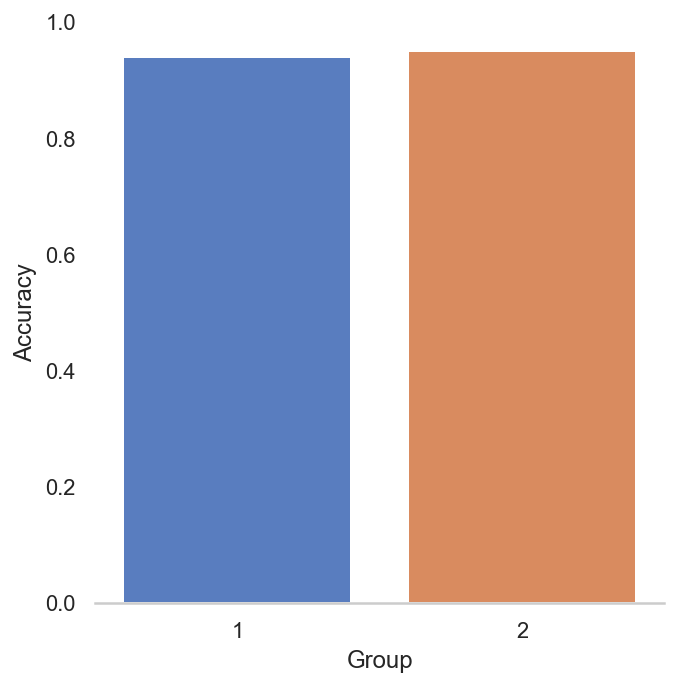

In [141]:
## Plotting

# Accuracy in Training

g = sns.catplot(x="Group", y="Accuracy", data=rt_training_results,
                height=5, kind="bar", palette="muted",ci=None)
g.set(ylim=(0, 1))
g.despine(left=True)
g.set_ylabels("Accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


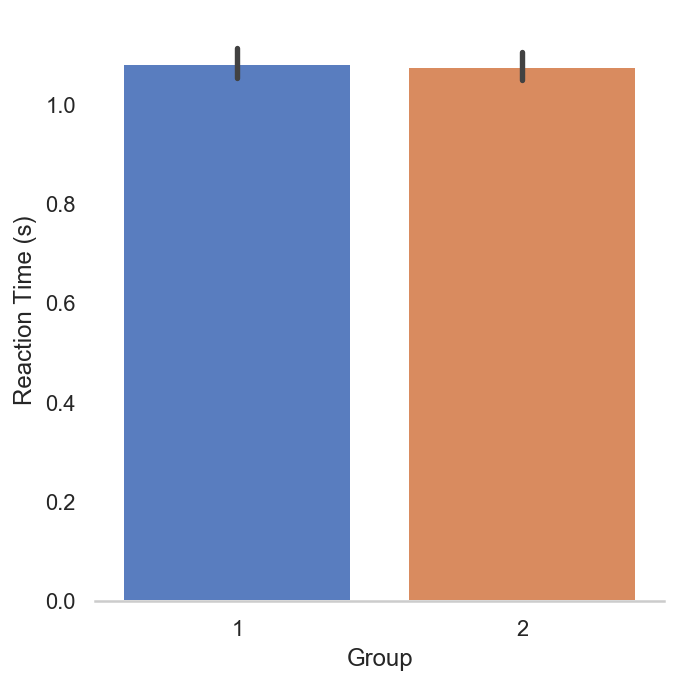

In [142]:
## Plotting

# Reaction time in Training

g = sns.catplot(x="Group", y="TrialRT", data=rt_training_results,
                height=5, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Reaction Time (s)")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


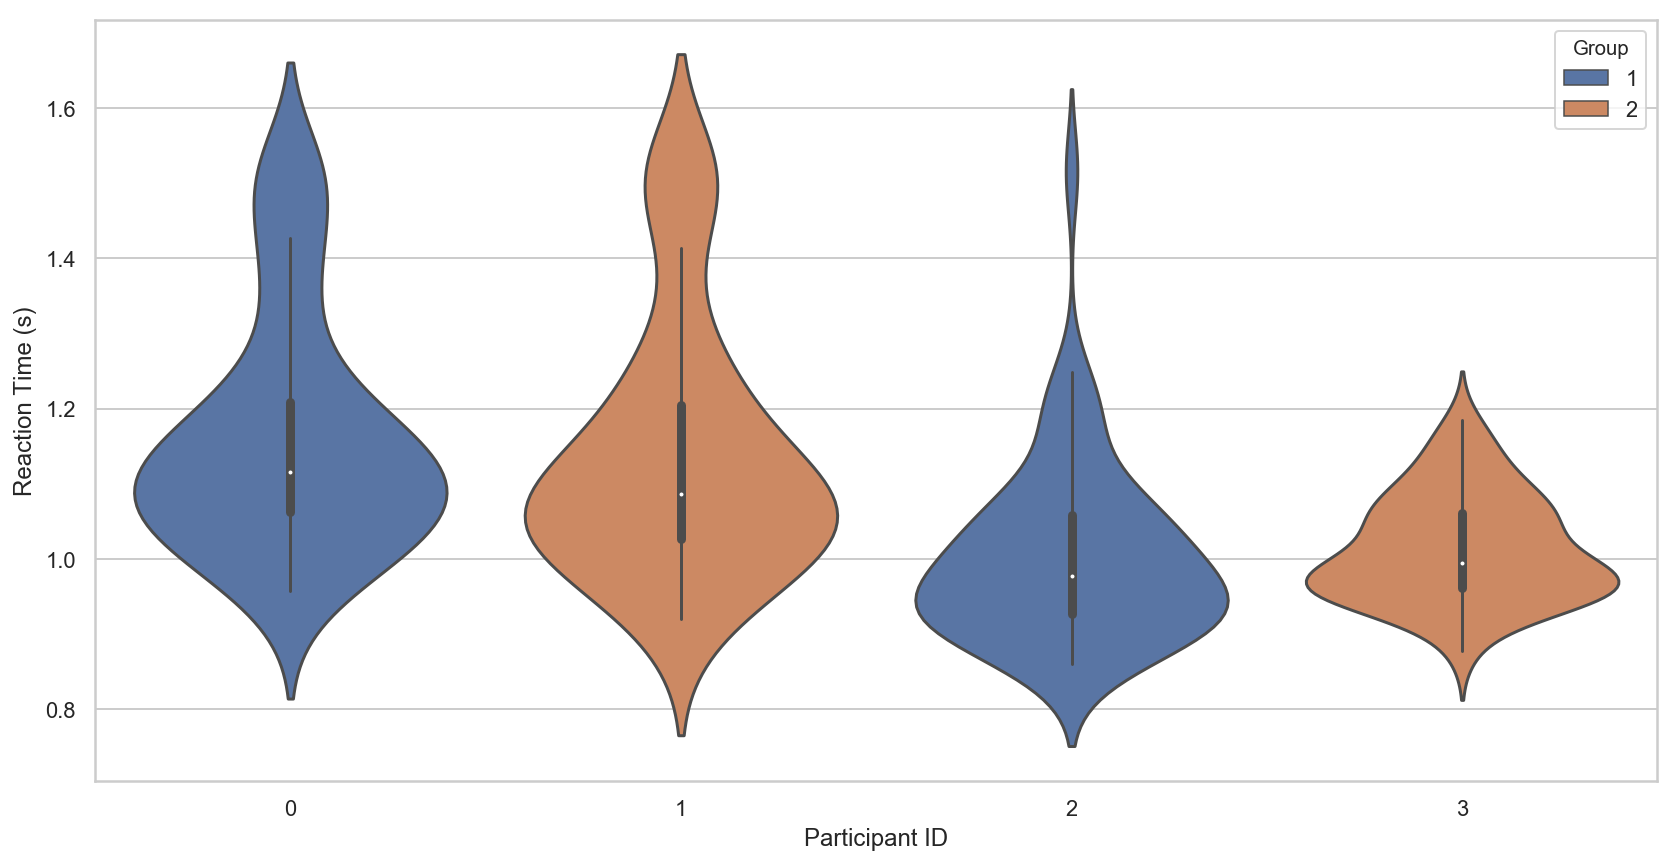

In [170]:
## Plotting

# Reaction time in training, per subject, by group

sns.set(style="whitegrid")
ax = sns.violinplot(x="SubjID", y="TrialRT", hue="Group",data=rt_training_results, dodge=False)
ax.set(xlabel='Participant ID', ylabel='Reaction Time (s)')
plt.show()

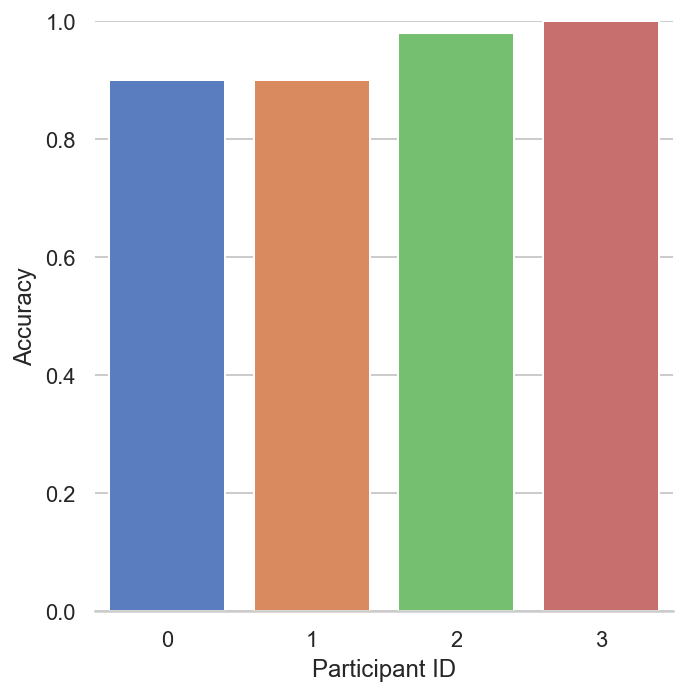

In [171]:
## Plotting

# Accuracy in training, per subject, by group

sns.set(style="whitegrid")
g = sns.catplot(x="SubjID", y="Accuracy", data=rt_training_results,
                height=5, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set(ylim=(0, 1))
g.set_ylabels("Accuracy")
g.set_xlabels("Participant ID")


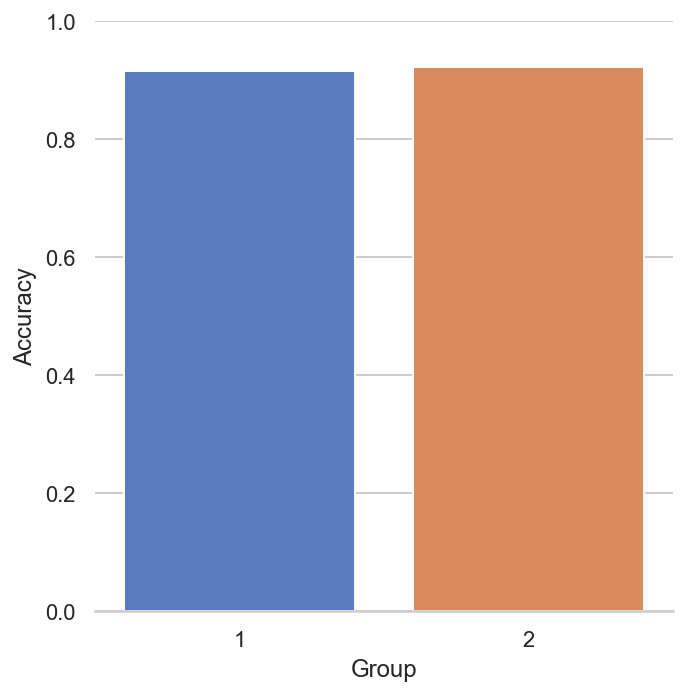

In [145]:
## Plotting

# Accuracy in Testing

g = sns.catplot(x="Group", y="Accuracy", data=testing_results,
                height=5, kind="bar", palette="muted",ci=None)
g.set(ylim=(0, 1))
g.despine(left=True)
g.set_ylabels("Accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


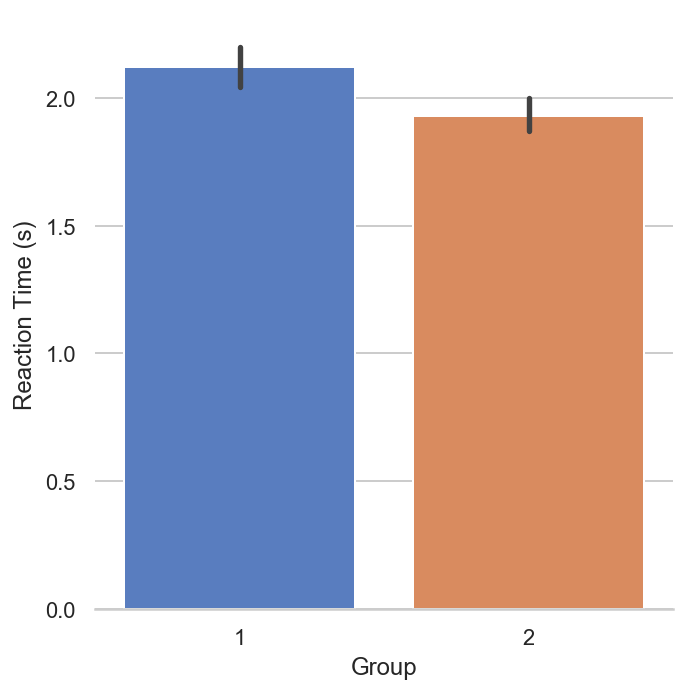

In [146]:
## Plotting

# Reaction time in Testing

g = sns.catplot(x="Group", y="TrialRT", data=testing_results,
                height=5, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Reaction Time (s)")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


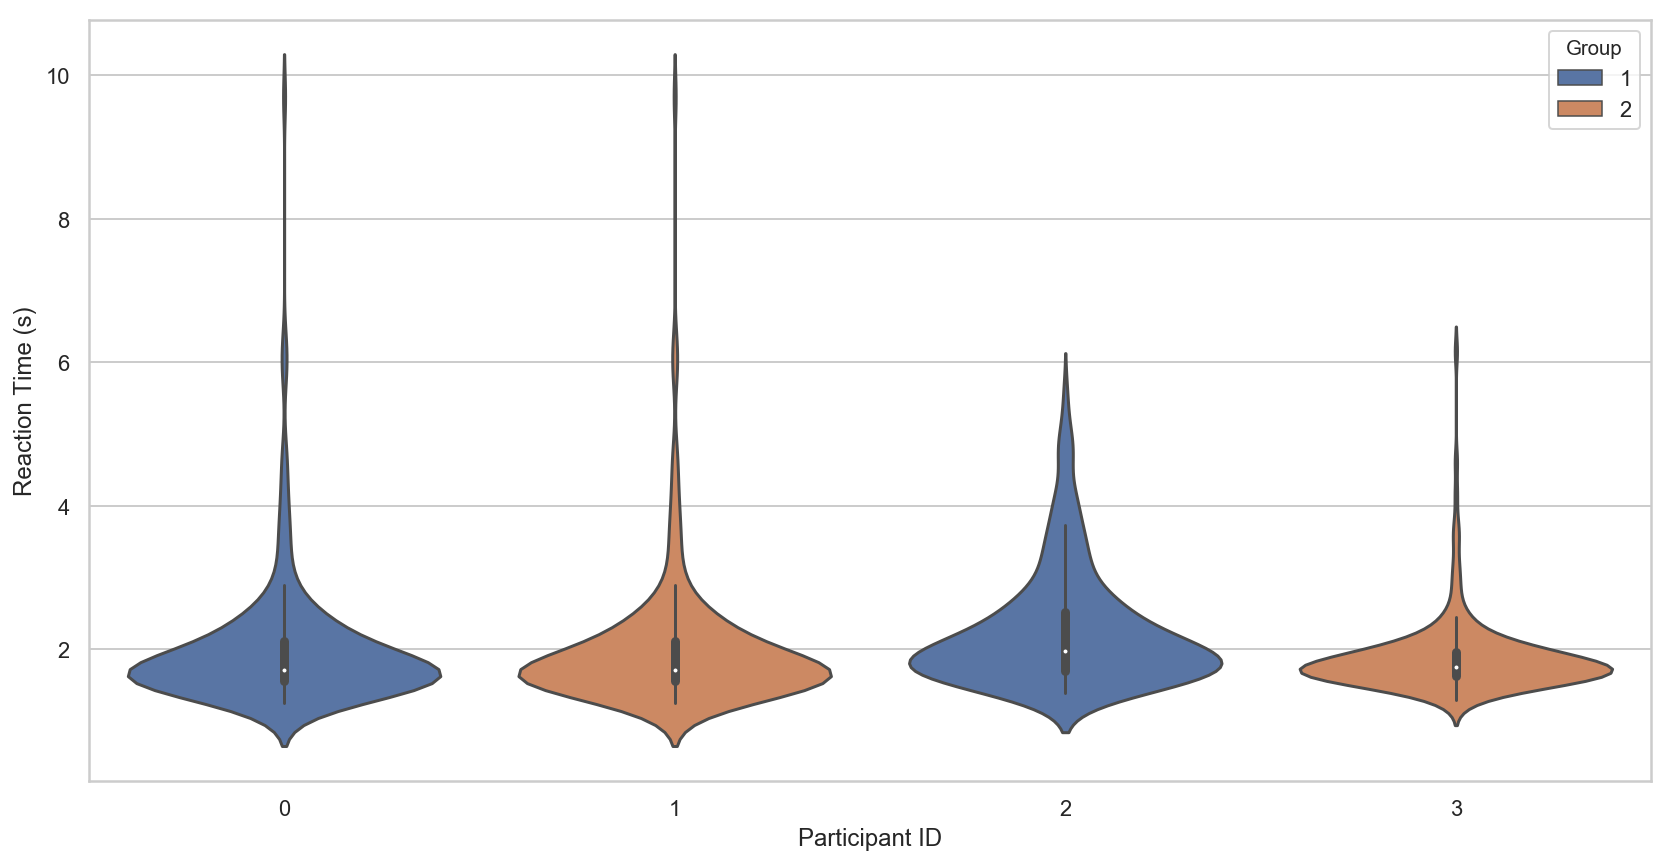

In [172]:
## Plotting

# Reaction time in testing, per subject, by group

sns.set(style="whitegrid")
ax = sns.violinplot(x="SubjID", y="TrialRT",hue='Group',data=testing_results,dodge=False)
ax.set(xlabel='Participant ID', ylabel='Reaction Time (s)')
plt.show()

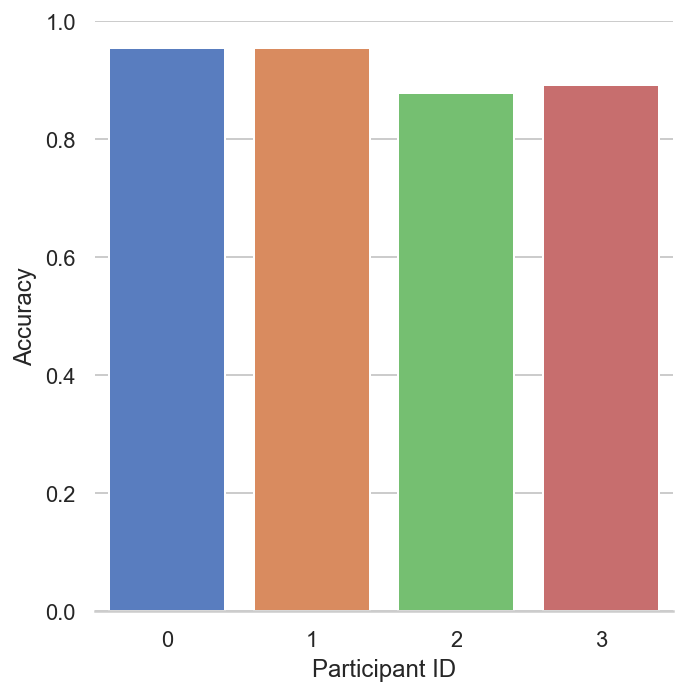

In [174]:
## Plotting

# Accuracy in testing, per subject, by group

sns.set(style="whitegrid")
g = sns.catplot(x="SubjID", y="Accuracy", data=testing_results,
                height=5, kind="bar", palette="muted", ci=None)
g.set(ylim=(0, 1))
g.despine(left=True)
g.set_ylabels("Accuracy")
g.set_xlabels("Participant ID")

In [258]:
## Analysis

from scipy.stats import ttest_rel
import statsmodels.api as sm
np.random.seed(12345678)

group1_mean_hits_train = np.mean([(sum(group1_Acc_data_training[0])),
                            (sum(group1_Acc_data_training[1]))])
group1_mean_misses_train = np.mean([(len(group1_Acc_data_training[0])-sum(group1_Acc_data_training[0])),
          (len(group1_Acc_data_training[1])-sum(group1_Acc_data_training[1]))])

group2_mean_hits_train = np.mean([(sum(group2_Acc_data_training[0])),
                            (sum(group2_Acc_data_training[1]))])
group2_mean_misses_train = np.mean([(len(group2_Acc_data_training[0])-sum(group2_Acc_data_training[0])),
          (len(group2_Acc_data_training[1])-sum(group2_Acc_data_training[1]))])


count = np.array([group1_mean_hits_train, group2_mean_hits_train])
nobs = np.array([50, 50])

training_RT_stat, training_RT_pval = stats.ttest_rel(np.mean(group1_RT_data_training,axis=1),
                                                     np.mean(group2_RT_data_training,axis=1))

print('P-value for training Reaction times:')
print(training_RT_pval)

training_Acc_stat, training_Acc_pval = sm.stats.proportions_ztest(count,nobs)

print('P-value for training Accuracy:')
print('{0:0.3f}'.format(training_Acc_pval))


group1_mean_hits_test = np.mean([(sum(group1_Acc_data_testing[0])),
                            (sum(group1_Acc_data_testing[1]))])
group1_mean_misses_test = np.mean([(len(group1_Acc_data_testing[0])-sum(group1_Acc_data_testing[0])),
          (len(group1_Acc_data_testing[1])-sum(group1_Acc_data_testing[1]))])

group2_mean_hits_test = np.mean([(sum(group2_Acc_data_testing[0])),
                            (sum(group2_Acc_data_testing[1]))])
group2_mean_misses_test = np.mean([(len(group2_Acc_data_testing[0])-sum(group2_Acc_data_testing[0])),
          (len(group2_Acc_data_testing[1])-sum(group2_Acc_data_testing[1]))])

count = np.array([group1_mean_hits_test, group2_mean_hits_test])
nobs = np.array([240, 240])

testing_RT_stat, testing_RT_pval = stats.ttest_rel(np.mean(group1_RT_data_testing,axis=1),
                                                   np.mean(group2_RT_data_testing,axis=1))

print('P-value for testing Reaction times:')
print(testing_RT_pval)

testing_Acc_stat, testing_Acc_pval = sm.stats.proportions_ztest(count,nobs)

print('P-value for testing Accuracy:')
print('{0:0.3f}'.format(testing_Acc_pval))

P-value for training Reaction times:
0.7443615675525286
P-value for training Accuracy:
0.826
P-value for testing Reaction times:
0.5000000000000016
P-value for testing Accuracy:
0.801
